In [2]:
#importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
# Merging all months data into 1
pwd = os.getcwd()



In [4]:
df = pd.read_csv(pwd + "/Sales_Data/Sales_April_2019.csv")

In [5]:
# listing all the file
files = [file for file in os.listdir(pwd+"/Sales_Data")]
all_month_data = pd.DataFrame()

In [6]:
# CONCAT all the files into one
for file in files:
    df = pd.read_csv(pwd+"/Sales_Data/"+file)
    all_month_data = pd.concat([all_month_data,df])

In [7]:
all_month_data.to_csv("all_month_data",index=False)


In [8]:
all_data = pd.read_csv(pwd+"/all_month_data")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [9]:
# What was the best month for sale . How much money was earned that month?


In [10]:
# adding month column using order date

all_data['Month'] = all_data['Order Date'].str[0:2]

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [12]:
# Cleaning the data
## sorting and dropping the NaN values
df_nan = all_data[all_data.isna().any(axis=1)]

In [13]:
#df_nan

In [14]:
all_data.dropna(how='all',inplace=True)

In [15]:
# Find 'or' and delete it
temp_df = all_data[all_data['Order Date'].str[0:2]=='Or']
#temp_df.head()
# a good way to clean up or is to include rows where orderdate != 'Or'
# this will include where there in no Or in row 'Order Date'
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']


In [16]:
all_data['Month'].astype('int' ) 

0         12
1         12
2         12
3         12
4         12
          ..
186845     6
186846     6
186847     6
186848     6
186849     6
Name: Month, Length: 185950, dtype: int64

In [17]:
# CONVERTING all columns to the correct format
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])#make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])#make float

In [18]:
#  adding sales column ( quantity * price)
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [20]:
# Deriving the best month for sales
results = all_data.groupby('Month').sum()

<BarContainer object of 12 artists>

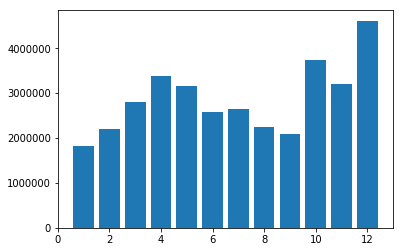

In [21]:
months = range(1,13)
plt.bar(months,results['Sales'])

In [22]:
# QUESTION2 - Which city has the highest number of sales

In [23]:
# Making the city column
#splitting using .apply and choosing 1st index as city name
# in apply formula , x is the cell content

In [24]:
# functions can be applied to elements of cell by using apply 
def get_state(address):
    return address.split(',')[2].split(' ')[1] # 2 times split as to remove zipcode using whitespace.
    

all_data['City'] = all_data['Purchase Address'].apply(lambda x:x.split(',')[1])
all_data['State'] = all_data['Purchase Address'].apply(lambda x:get_state(x))

all_data['City'] = all_data['City'] + " " + all_data['State']

In [25]:
all_data.drop(columns='State',inplace=True)


In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


In [27]:
# City with the highest sales
city_results = all_data.groupby('City').sum().reset_index()

In [28]:
city_results
# plotting
cities = [city for city, df in all_data.groupby('City')]
## above code is to maintain order of city while using group by function

In [29]:
city_results

,City,Quantity Ordered,Price Each,Sales
0,Atlanta GA,16602,2.779908e+06,2.795499e+06
1,Austin TX,11153,1.809874e+06,1.819582e+06
2,Boston MA,22528,3.637410e+06,3.661642e+06
3,Dallas TX,16730,2.752628e+06,2.767975e+06
4,Los Angeles CA,33289,5.421435e+06,5.452571e+06
5,New York City NY,27932,4.635371e+06,4.664317e+06
6,Portland ME,2750,4.471893e+05,4.497583e+05
7,Portland OR,11303,1.860558e+06,1.870732e+06
8,San Francisco CA,50239,8.211462e+06,8.262204e+06
9,Seattle WA,16553,2.733296e+06,2.747755e+06


([<matplotlib.axis.XTick at 0x1140f0dd8>,
 <a list of 10 Text xticklabel objects>)

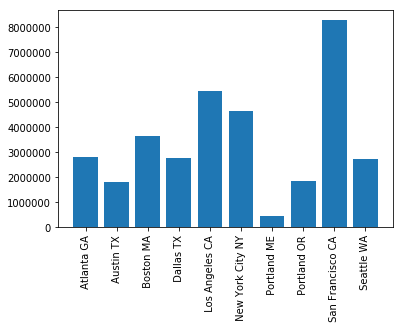

In [30]:
plt.bar(cities,city_results['Sales'])
plt.xticks(cities,rotation='vertical')

In [31]:
# At what time we should display advertisements to increase our sale

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


In [33]:
# Converting the 'Order Date' column to datatime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [34]:
# Adding 'Hour' column
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [35]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38


In [36]:
hours = [hour for hour, df in all_data.groupby('Hour')]

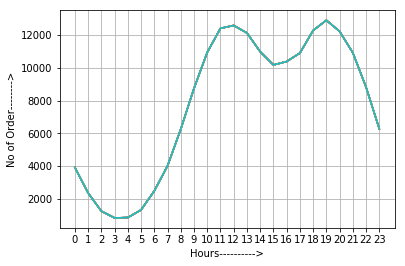

In [37]:
plt.plot(hours,all_data.groupby(['Hour']).count()) 
plt.xticks(hours)
plt.xlabel('Hours---------->')
plt.ylabel('No of Order-------->')
plt.grid()
# in above for y we just group by Hour and count the rows for each hour .
# This tells us at which hour most purchases are made 

In [38]:
#Question : What products are most often sold together?(using order id)

In [39]:
# creating a new dataframe containing only duplicate value

In [40]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]


In [41]:
# grouping all order id with product on same line
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
df.head()
df = df[['Order ID','Grouped']].drop_duplicates()

In [43]:
df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [44]:
# importing new libraries for counting
from itertools import combinations
from collections import Counter

In [45]:
count = Counter()

for row in df['Grouped']:
    row_sublist = row.split(',')
    count.update(combinations(row_sublist,2))



#count

In [46]:
# Question : What product sold the most ? Why did it sold the most
# to do that sum up the quantiy grouping by the product

In [47]:
product_group = all_data.groupby('Product')

In [57]:
product_group.sum() 
product_quantity = product_group.sum()['Quantity Ordered']


In [59]:
products = [product for product , df in product_group]

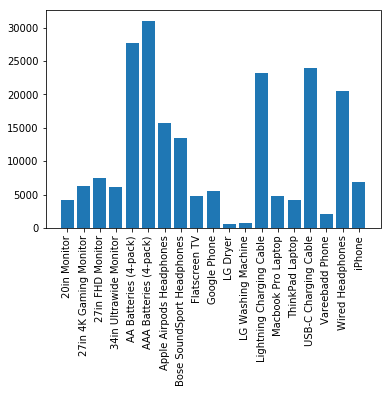

In [61]:
plt.bar(products, product_quantity)
plt.xticks(products,rotation = 'vertical')
plt.show()

In [64]:
prices = all_data.groupby('Product').mean()['Price Each']

In [69]:
# Overlaying another ylabel

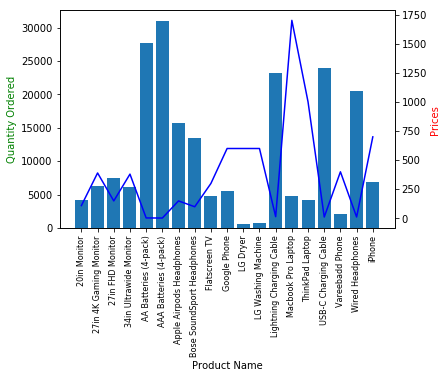

In [72]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, product_quantity)
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Prices ', color = 'r')
ax1.set_xticklabels(products , rotation = 'vertical',size = 8)
plt.show()